In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import MarkerCluster

In [2]:
df = pd.read_csv('../input/seattledatacollisionscsv/Seattle-Data-Collisions.csv',encoding = "ISO-8859-1")
df.describe()



,ï»¿X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,2.140500e+05,214050.000000,221525.000000,221525.000000,221525.000000,71936.000000,221525.000000,221525.000000,221525.000000,221525.000000,221525.000000,221525.000000,221525.000000,221524.000000,1.272050e+05,221525.000000,2.215250e+05
mean,1.271147e+06,229822.714977,110763.000000,144824.873233,145053.886627,37626.275537,2.226941,0.038118,0.027360,1.730482,0.373935,0.015208,0.001693,13.383042,7.971063e+06,261.135903,9.577244e+03
std,7.361903e+03,20463.229585,63948.903529,89222.567072,89598.173976,51968.207339,1.470050,0.201766,0.164537,0.829754,0.732077,0.158052,0.044888,7.300182,2.611523e+06,3246.962907,7.146156e+04
min,1.249026e+06,184059.089009,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.266677e+06,214145.383695,55382.000000,71668.000000,71668.000000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,1.271142e+06,228336.487966,110763.000000,127252.000000,127252.000000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,1.276029e+06,245908.853680,166144.000000,209935.000000,210155.000000,33984.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,1.293052e+06,271525.414794,221525.000000,334020.000000,335520.000000,764413.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [3]:
df.shape

(221525, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221525 entries, 0 to 221524
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ï»¿X             214050 non-null  float64
 1   Y                214050 non-null  float64
 2   OBJECTID         221525 non-null  int64  
 3   INCKEY           221525 non-null  int64  
 4   COLDETKEY        221525 non-null  int64  
 5   REPORTNO         221525 non-null  object 
 6   STATUS           221525 non-null  object 
 7   ADDRTYPE         217813 non-null  object 
 8   INTKEY           71936 non-null   float64
 9   LOCATION         216935 non-null  object 
 10  EXCEPTRSNCODE    101122 non-null  object 
 11  EXCEPTRSNDESC    11779 non-null   object 
 12  SEVERITYCODE     221524 non-null  object 
 13  SEVERITYDESC     221525 non-null  object 
 14  COLLISIONTYPE    195212 non-null  object 
 15  PERSONCOUNT      221525 non-null  int64  
 16  PEDCOUNT         221525 non-null  int6

In [5]:
df.drop(columns=['INJURIES','SERIOUSINJURIES','FATALITIES'],axis=1)

,ï»¿X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1.268354e+06,265256.609668,1,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,...,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
1,1.259316e+06,202173.388163,2,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,...,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,1.264342e+06,259613.000382,3,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,1.279221e+06,222017.872023,4,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,1.262205e+06,242179.124204,5,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221520,1.262740e+06,210740.937164,221521,326318,327818,3747069,Matched,Block,NaN,DELRIDGE WAY SW BETWEEN SW ANDOVER ST AND SW D...,...,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
221521,1.273685e+06,242477.237164,221522,326625,328125,E990871,Matched,Block,NaN,NE NORTHLAKE PL BETWEEN PASADENA PL NE AND 7TH...,...,Dry,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
221522,1.284911e+06,199313.574656,221523,324392,325892,E966052,Matched,Block,NaN,48TH AVE S BETWEEN S GARDEN ST AND S OTHELLO ST,...,Dry,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
221523,1.267113e+06,227934.797725,221524,325783,327283,E979936,Matched,Intersection,29690.0,2ND AVE AND BATTERY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N


In [6]:
print(df.columns.values)

['ï»¿X' 'Y' 'OBJECTID' 'INCKEY' 'COLDETKEY' 'REPORTNO' 'STATUS' 'ADDRTYPE'
 'INTKEY' 'LOCATION' 'EXCEPTRSNCODE' 'EXCEPTRSNDESC' 'SEVERITYCODE'
 'SEVERITYDESC' 'COLLISIONTYPE' 'PERSONCOUNT' 'PEDCOUNT' 'PEDCYLCOUNT'
 'VEHCOUNT' 'INJURIES' 'SERIOUSINJURIES' 'FATALITIES' 'INCDATE' 'INCDTTM'
 'JUNCTIONTYPE' 'SDOT_COLCODE' 'SDOT_COLDESC' 'INATTENTIONIND' 'UNDERINFL'
 'WEATHER' 'ROADCOND' 'LIGHTCOND' 'PEDROWNOTGRNT' 'SDOTCOLNUM' 'SPEEDING'
 'ST_COLCODE' 'ST_COLDESC' 'SEGLANEKEY' 'CROSSWALKKEY' 'HITPARKEDCAR']


In [7]:
print(df.dtypes)

ï»¿X               float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

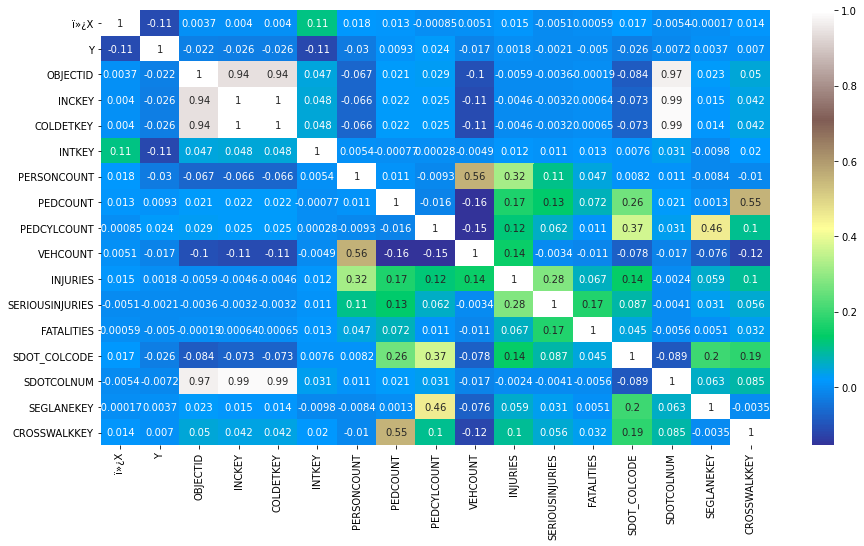

In [8]:
# Find the correlation 
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='terrain')

# Positive Correlation:

# Number of pedestrians involved in the collision  (PEDCOUNT) and Severity 

# Number of people involved in the collision (PERSONCOUNT) and Severity


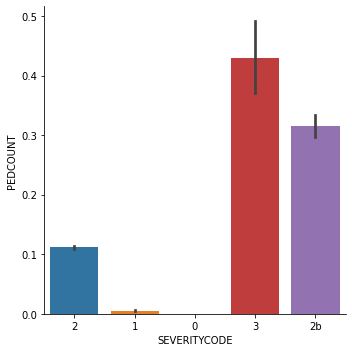

In [9]:
# The number of pedestrians involved in the collision.
sns.catplot(x="SEVERITYCODE", y="PEDCOUNT", data=df, kind="bar")

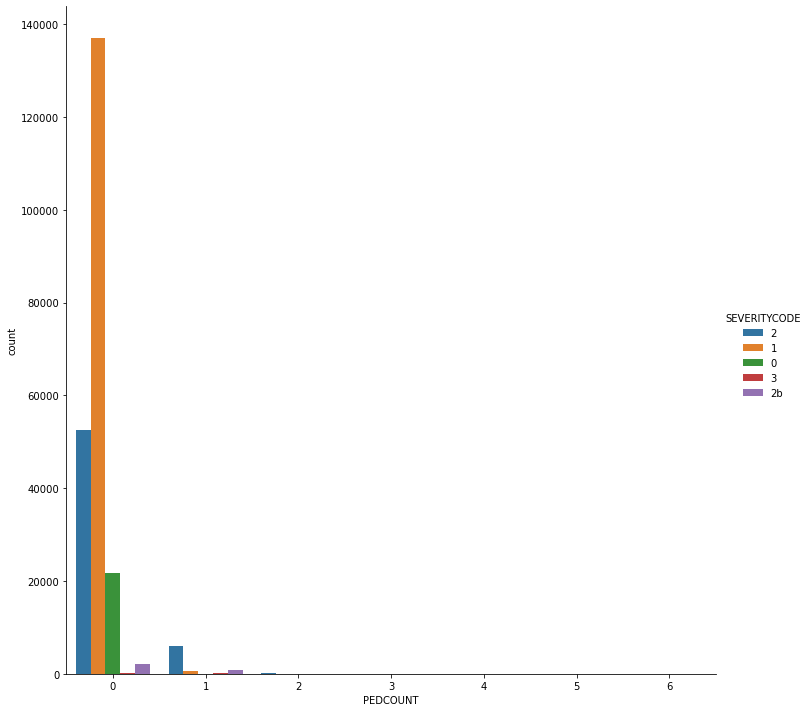

In [10]:
sns.catplot(x="PEDCOUNT", data=df, kind="count", height=10, aspect=1, hue='SEVERITYCODE') 

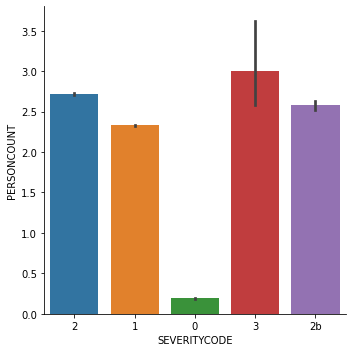

In [11]:
#The total number of people involved in thecollision
sns.catplot(x="SEVERITYCODE", y = "PERSONCOUNT", data=df, kind="bar")

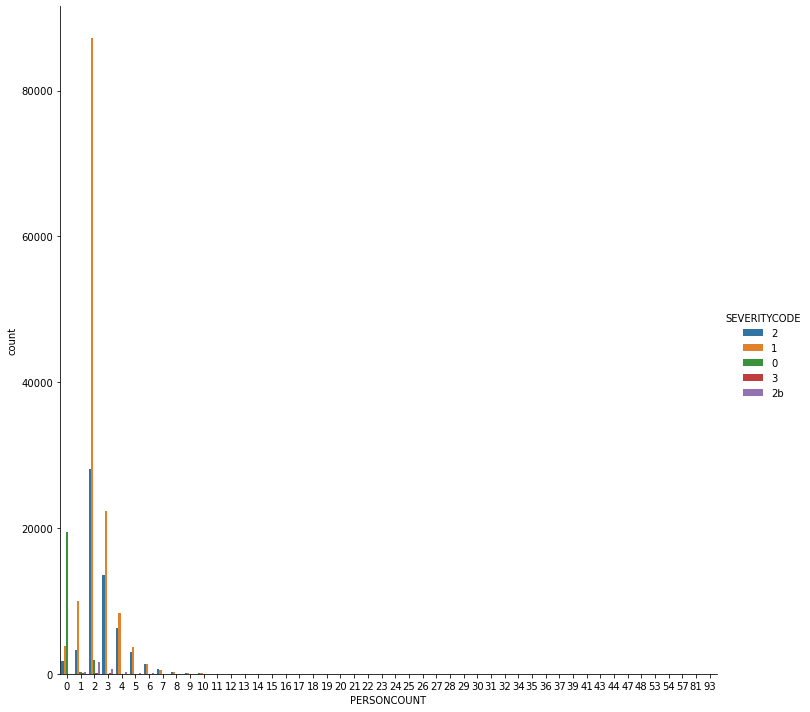

In [12]:
sns.catplot(x="PERSONCOUNT", data=df, kind="count", height=10, aspect=1, hue='SEVERITYCODE') 

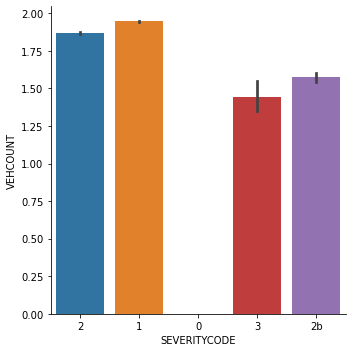

In [13]:
sns.catplot(x="SEVERITYCODE", y = "VEHCOUNT", data=df, kind="bar")
#sns.boxplot(x="SEVERITYCODE", y="PERSONCOUNT", data=df)

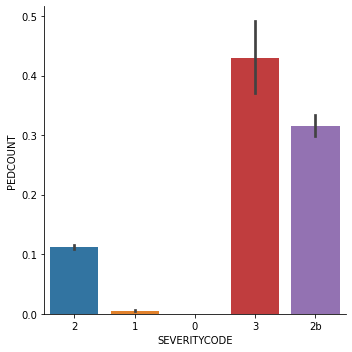

In [14]:
sns.catplot(x="SEVERITYCODE", y = "PEDCOUNT", data=df, kind="bar")

# Observation : Severity 2 (Injury) accidents has happened to Pedestrians, compared to Sev 1 accidents 

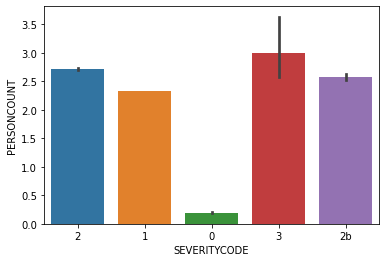

In [15]:
sns.barplot(x="SEVERITYCODE", y="PERSONCOUNT", data=df)

# Observation : Seems severity of accident is more as number of persons involved in accident is more

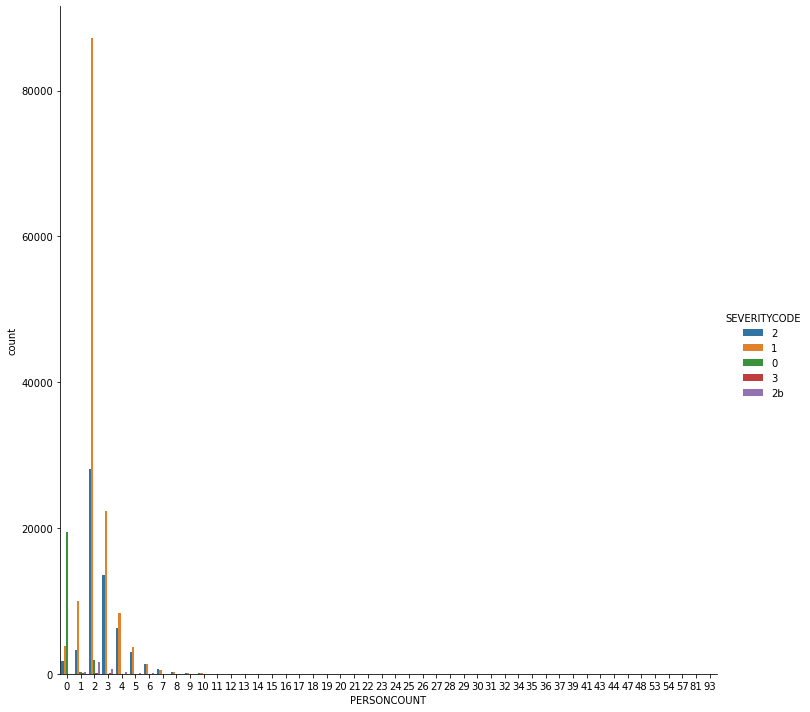

In [16]:
sns.catplot(x="PERSONCOUNT", data=df, kind="count", height=10, aspect=1, hue='SEVERITYCODE') 

# Observation : When person counts is in the range of 2-4 then it seems more accidents are happening. Largely when 2 or 3 passengers are traveling

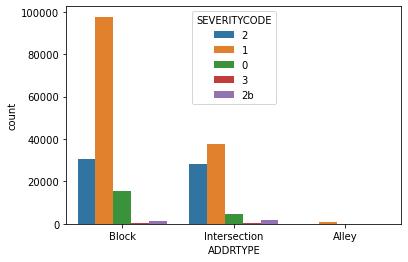

In [17]:
# Count plot for Address type : 
sns.countplot(x='ADDRTYPE', data=df, hue='SEVERITYCODE')

# Observation : Most accidents are happening in BLOCK, less at intersection. Severity 2 is same on Block and on Intersection

In [18]:
#sns.catplot(x="COLLISIONTYPE", y = "SEVERITYCODE", data=df, kind="bar",height=8, aspect=2)

# Observation : Cycles and Pedestrian seems to be involved in Severity 2 accidents 

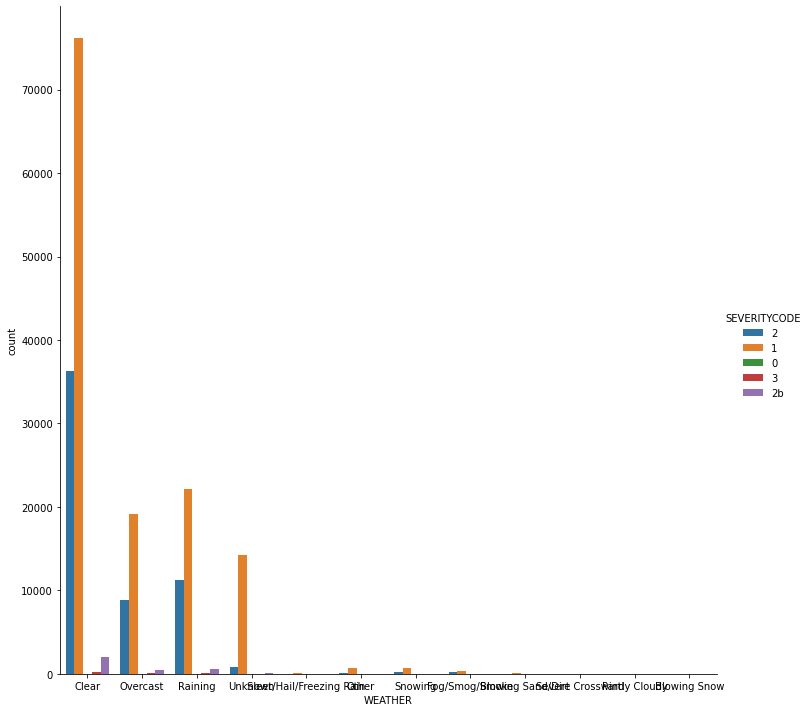

In [19]:
sns.catplot(x="WEATHER", data=df, kind="count", height=10, aspect=1, hue='SEVERITYCODE') 

# Observation : Most accidents happening when weather is CLEAR, with slightly less accidents when weather is Overcast and Raining 

In [20]:
df['ROADCOND'].value_counts().to_frame('count')


,count
Dry,128588
Wet,48734
Unknown,15139
Ice,1232
Snow/Slush,1014
Other,136
Standing Water,119
Sand/Mud/Dirt,77
Oil,64


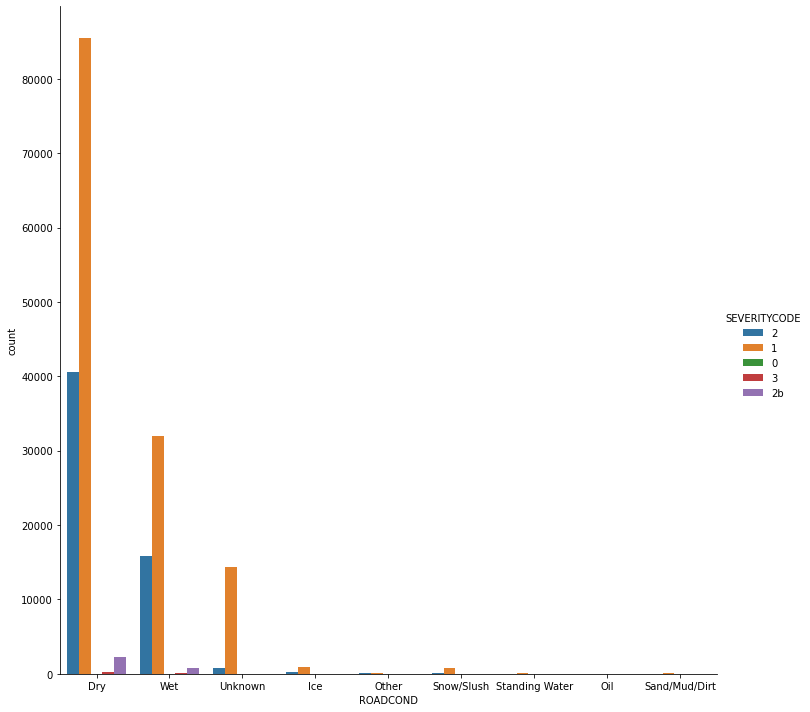

In [21]:
#sns.catplot(x="ROADCOND", y = "SEVERITYCODE", data=df, kind="bar", height=8, aspect=2) 
sns.catplot(x="ROADCOND", data=df, kind="count", height=10, aspect=1, hue='SEVERITYCODE') 

# Observation : Most accidents happening when Road condition is DRY, with slightly less accidents when weather is wet and unknown 

In [22]:
df['LIGHTCOND'].value_counts().to_frame('count')

,count
Daylight,119492
Dark - Street Lights On,50133
Unknown,13532
Dusk,6082
Dawn,2609
Dark - No Street Lights,1579
Dark - Street Lights Off,1239
Other,244
Dark - Unknown Lighting,23


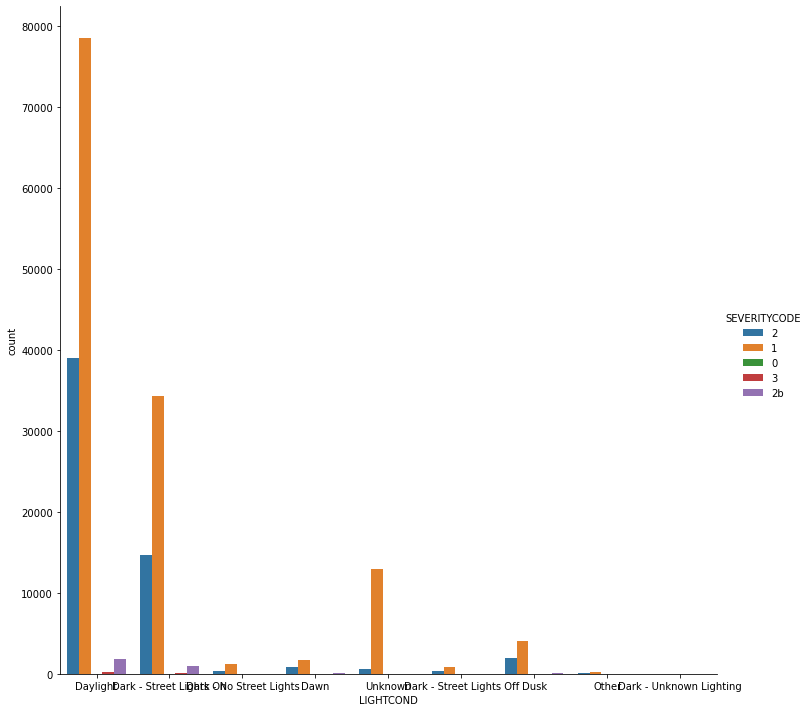

In [23]:
#sns.catplot(x="LIGHTCOND", y = "SEVERITYCODE", data=df, kind="bar", height=8, aspect=2) 
sns.catplot(x="LIGHTCOND", data=df, kind="count", height=10, aspect=1, hue='SEVERITYCODE') 

In [24]:
df['UNDERINFL'].value_counts().to_frame('count')

,count
N,103927
0,81676
Y,5399
1,4230


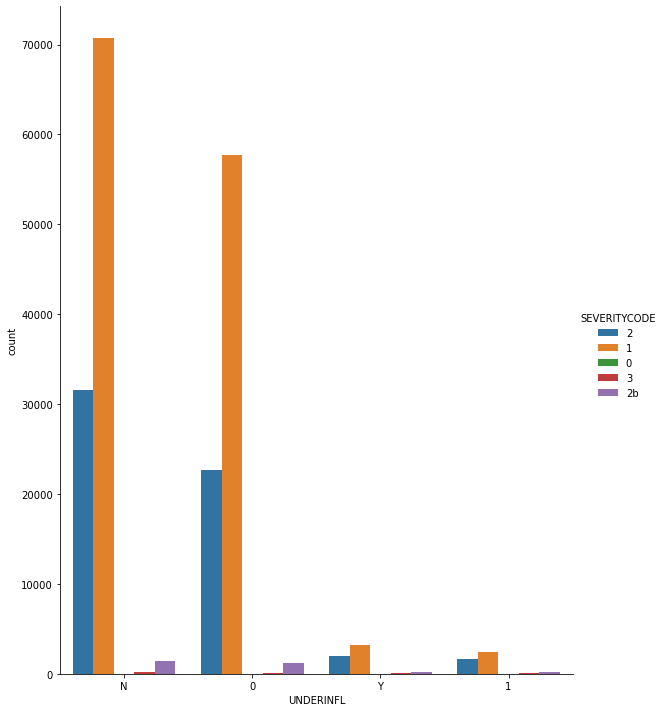

In [25]:
#sns.catplot(x="UNDERINFL", y = "SEVERITYCODE", data=df, kind="bar", height=8, aspect=2) 
sns.catplot(x="UNDERINFL", data=df, kind="count", height=10, aspect=.8, hue='SEVERITYCODE') 

In [26]:
df['SPEEDING'].value_counts().to_frame()

,SPEEDING
Y,9929


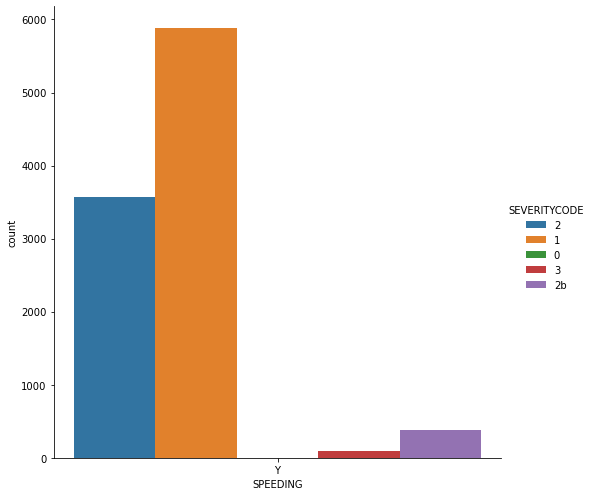

In [27]:
#sns.catplot(x="SPEEDING", y = "SEVERITYCODE", data=df, kind="bar") 
sns.catplot(x="SPEEDING", data=df, kind="count", height=7, aspect=1, hue='SEVERITYCODE') 

# Observation : For about 9300 car accidents, speeding seems to be the problem

In [28]:
#sns.catplot(x="HITPARKEDCAR", y = "SEVERITYCODE", data=df, kind="bar") 

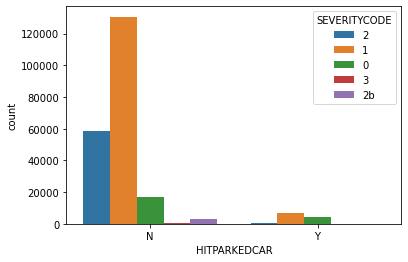

In [29]:
sns.countplot(x='HITPARKEDCAR', data=df, hue='SEVERITYCODE')

In [30]:
df['WEATHER'].value_counts().to_frame('count')


,count
Clear,114738
Raining,34036
Overcast,28552
Unknown,15131
Snowing,919
Other,860
Fog/Smog/Smoke,577
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56
Severe Crosswind,26


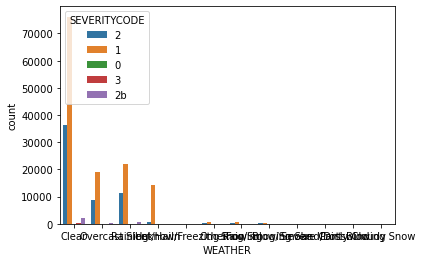

In [31]:
# Count plot for WEATHER type : 
sns.countplot(x='WEATHER', data=df, hue='SEVERITYCODE')

In [32]:
# Date and Time of the incident 

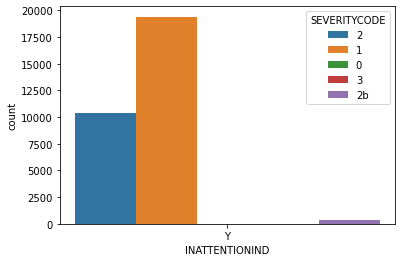

In [33]:
sns.countplot(x='INATTENTIONIND', data=df, hue='SEVERITYCODE')

In [34]:
df['SEVERITYCODE'].value_counts().to_frame('count')

,count
1,137671
2,58783
0,21615
2b,3105
3,350


In [35]:
map = folium.Map(location=[47.60, -122.33], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
locations = df[['Y', 'ï»¿X']][df['Y'].notna()].head(1000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map

In [36]:
# data pre-processes

df.isna().sum()

ï»¿X                 7475
Y                    7475
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3712
INTKEY             149589
LOCATION             4590
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209746
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26313
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11974
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191337
UNDERINFL           26293
WEATHER             26503
ROADCOND            26422
LIGHTCOND           26592
PEDROWNOTGRNT      216330
SDOTCOLNUM          94320
SPEEDING           211596
ST_COLCODE           9413
ST_COLDESC          26313
SEGLANEKEY              0
CROSSWALKKEY

In [37]:
df.duplicated().sum()

0

In [38]:
# Select relevant field # and drop others

# 'SERIOUSINJURIES', 'FATALITIES', 'INJURIES',
data_clean = df[['ï»¿X', 'Y', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
                   'SPEEDING', 'SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221525 entries, 0 to 221524
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿X          214050 non-null  float64
 1   Y             214050 non-null  float64
 2   WEATHER       195022 non-null  object 
 3   ROADCOND      195103 non-null  object 
 4   LIGHTCOND     194933 non-null  object 
 5   SPEEDING      9929 non-null    object 
 6   SEVERITYCODE  221524 non-null  object 
 7   PERSONCOUNT   221525 non-null  int64  
 8   PEDCOUNT      221525 non-null  int64  
 9   PEDCYLCOUNT   221525 non-null  int64  
 10  VEHCOUNT      221525 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 18.6+ MB


In [39]:
# Fixing the SPEEDING field by encoding it to 0 for the blanks and 1 for the Y values.
data_clean['SPEEDING'] = data_clean['SPEEDING'].map({'Y': 1})
data_clean['SPEEDING'].replace(np.nan, 0, inplace=True)
data_clean['SPEEDING'].value_counts().to_frame()

,SPEEDING
0.0,211596
1.0,9929


In [40]:
data_clean.dropna(axis=0, inplace=True)


In [41]:
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 189509 entries, 0 to 221523
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿X          189509 non-null  float64
 1   Y             189509 non-null  float64
 2   WEATHER       189509 non-null  object 
 3   ROADCOND      189509 non-null  object 
 4   LIGHTCOND     189509 non-null  object 
 5   SPEEDING      189509 non-null  float64
 6   SEVERITYCODE  189509 non-null  object 
 7   PERSONCOUNT   189509 non-null  int64  
 8   PEDCOUNT      189509 non-null  int64  
 9   PEDCYLCOUNT   189509 non-null  int64  
 10  VEHCOUNT      189509 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 17.4+ MB


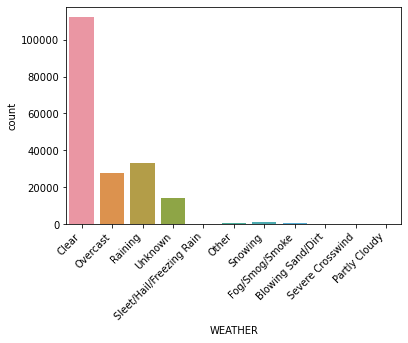

In [42]:
ax = sns.countplot(data_clean['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

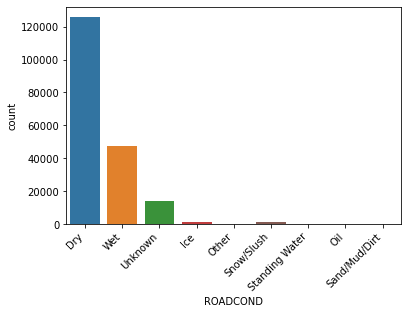

In [43]:
ax = sns.countplot(data_clean['ROADCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

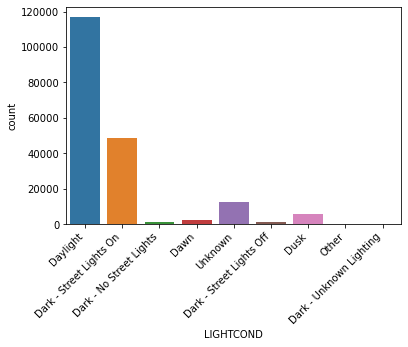

In [44]:
ax = sns.countplot(data_clean['LIGHTCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

In [45]:
#sns.countplot(data_clean['UNDERINFL'])

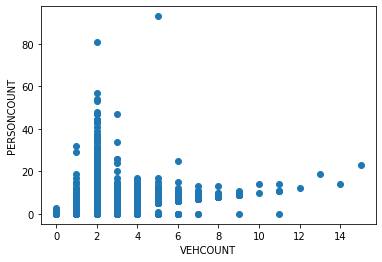

In [46]:
ax = plt.scatter(data_clean['VEHCOUNT'], data_clean['PERSONCOUNT'])
plt.xlabel('VEHCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

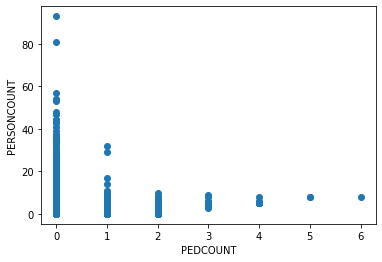

In [47]:
ax = plt.scatter(data_clean['PEDCOUNT'], data_clean['PERSONCOUNT'])
plt.xlabel('PEDCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

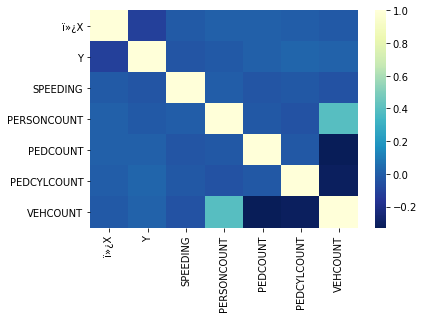

In [48]:
sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

In [49]:
data_clean = pd.concat([data_clean.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=1), 
           pd.get_dummies(data_clean['ROADCOND']),
           pd.get_dummies(data_clean['LIGHTCOND']),
           pd.get_dummies(data_clean['WEATHER'])], axis=1)

In [50]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [51]:
data_clean.head(5).T

,0,1,2,3,4
ï»¿X,1.27916e+06,1.27437e+06,1.27e+06,1.27038e+06,1.26577e+06
Y,218934,231243,222492,224605,255610
SPEEDING,0,1,0,0,0
SEVERITYCODE,2,1,1,1,1
PERSONCOUNT,2,3,1,3,4
PEDCOUNT,0,0,0,0,0
PEDCYLCOUNT,0,0,0,0,0
VEHCOUNT,2,2,1,2,3
Dry,1,1,0,0,1
Ice,0,0,0,0,0


In [52]:
from sklearn import preprocessing
x = data_clean.drop(['SEVERITYCODE'], axis=1)
y = data_clean[['SEVERITYCODE']]
data_clean_scaled = preprocessing.StandardScaler().fit(x).transform(x)
data_clean_scaled[0:3]

array([[ 1.08204643, -0.51667524, -0.22696561, -0.34208039, -0.2036887 ,
        -0.17937792,  0.05823561,  0.7110675 , -0.07969397, -0.01672568,
        -0.02517174, -0.01852321, -0.07261398, -0.02365699, -0.28084988,
        -0.57633272, -0.08908116, -0.07932432, -0.58921074, -0.0110173 ,
        -0.1162293 ,  0.78867524, -0.17988442, -0.03209415, -0.26545563,
        -0.01608197,  0.8285187 , -0.05448918, -0.06482346, -0.41575156,
        -0.00726435, -0.45808061, -0.01148639, -0.02464142, -0.06907805,
        -0.28118871],
       [ 0.43161029,  0.08187322,  4.40595392,  0.38456915, -0.2036887 ,
        -0.17937792,  0.05823561,  0.7110675 , -0.07969397, -0.01672568,
        -0.02517174, -0.01852321, -0.07261398, -0.02365699, -0.28084988,
        -0.57633272, -0.08908116, -0.07932432, -0.58921074, -0.0110173 ,
        -0.1162293 ,  0.78867524, -0.17988442, -0.03209415, -0.26545563,
        -0.01608197,  0.8285187 , -0.05448918, -0.06482346, -0.41575156,
        -0.00726435, -0.45808

In [53]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_clean_scaled, y, 
                                                    test_size=0.2, random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier
dTreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dTreeModel.fit(x_train, y_train)
dTreeModel

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [55]:
yHat = dTreeModel.predict(x_test)

In [56]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       0.74      0.96      0.84     26065
           2       0.68      0.26      0.38     11227
          2b       0.00      0.00      0.00       550
           3       0.00      0.00      0.00        60

    accuracy                           0.74     37902
   macro avg       0.36      0.31      0.30     37902
weighted avg       0.71      0.74      0.69     37902



In [57]:
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators=75)
rfcModel.fit(x_train, y_train)

RandomForestClassifier(n_estimators=75)

In [58]:
yHat = rfcModel.predict(x_test)

In [59]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       0.76      0.83      0.79     26065
           2       0.49      0.39      0.44     11227
          2b       0.06      0.02      0.03       550
           3       0.00      0.00      0.00        60

    accuracy                           0.69     37902
   macro avg       0.33      0.31      0.31     37902
weighted avg       0.67      0.69      0.67     37902



In [60]:
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression(C=0.01)
logRegModel.fit(x_train, y_train)
logRegModel

LogisticRegression(C=0.01)

In [61]:
yHat = logRegModel.predict(x_test)

In [62]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       0.73      0.98      0.84     26065
           2       0.74      0.21      0.33     11227
          2b       0.40      0.00      0.01       550
           3       0.00      0.00      0.00        60

    accuracy                           0.73     37902
   macro avg       0.47      0.30      0.29     37902
weighted avg       0.73      0.73      0.67     37902

